In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

C:\Users\SWAPNIL DHIMAN\.conda\envs\gputest\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SWAPNIL DHIMAN\.conda\envs\gputest\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SWAPNIL DHIMAN\.conda\envs\gputest\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SWAPNIL DHIMAN\.conda\envs\gputest\lib\s

In [2]:
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [6]:
import numpy as np
from matplotlib import pyplot as plt

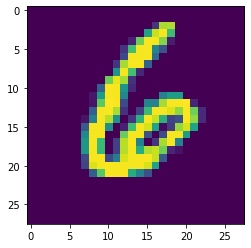

In [12]:
first_image = x_train[13]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [13]:
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

In [14]:
y_train=one_hot(y_train,10)
y_test=one_hot(y_test,10)

In [15]:
y_train.shape

(60000, 10)

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
input_width = 28
input_height = 28
input_channels = 1
input_pixels = 784

n_conv1 = 32
n_conv2 = 64
stride_conv1 = 1
stride_conv2 = 1
conv1_k = 5
conv2_k = 5
max_pool1_k = 2
max_pool2_k = 2

n_hidden = 1024
n_out = 10

input_size_to_hidden = (input_width//(max_pool1_k*max_pool2_k)) * (input_height//(max_pool1_k*max_pool2_k)) *n_conv2

In [18]:
weights = {
    "wc1" : tf.Variable(tf.random.normal([conv1_k, conv1_k, input_channels, n_conv1])),
    "wc2" : tf.Variable(tf.random.normal([conv2_k, conv2_k, n_conv1, n_conv2])),
    "wh1" : tf.Variable(tf.random.normal([input_size_to_hidden, n_hidden])),
    "wo" : tf.Variable(tf.random.normal([n_hidden, n_out]))
}

biases = {
    "bc1" : tf.Variable(tf.random.normal([n_conv1])),
    "bc2" : tf.Variable(tf.random.normal([n_conv2])),
    "bh1" : tf.Variable(tf.random.normal([n_hidden])),
    "bo" : tf.Variable(tf.random.normal([n_out])),
}

In [19]:
def conv(x, weights, bias, strides = 1):
    out = tf.nn.conv2d(x, weights, padding="SAME", strides = [1, strides, strides, 1])
    out = tf.nn.bias_add(out, bias)
    out = tf.nn.relu(out)
    return out

def maxpooling(x, k = 2):
    return tf.nn.max_pool(x, padding = "SAME", ksize = [1, k, k, 1], strides = [1, k, k, 1])

In [20]:
def cnn(x, weights, biases, keep_prob):
    x = tf.reshape(x, shape = [-1 ,input_height, input_width, input_channels])
    conv1 = conv(x, weights['wc1'], biases['bc1'], stride_conv1)
    conv1_pool = maxpooling(conv1, max_pool1_k)
    
    conv2 = conv(conv1_pool, weights['wc2'], biases['bc2'], stride_conv2)
    conv2_pool = maxpooling(conv2, max_pool2_k)
    
     
    hidden_input = tf.reshape(conv2_pool, shape = [-1, input_size_to_hidden])
    hidden_output_before_activation = tf.add(tf.matmul(hidden_input, weights['wh1']), biases['bh1'])
    hidden_output_before_dropout = tf.nn.relu(hidden_output_before_activation)
    
    #dropout layer is used before hidden to avoid overfitting
  
    hidden_output = tf.nn.dropout(hidden_output_before_dropout, keep_prob) 
   
    output = tf.add(tf.matmul(hidden_output, weights['wo']), biases['bo'])
    return output

In [21]:
x = tf.compat.v1.placeholder("float", [None, input_pixels])
y = tf.compat.v1.placeholder(tf.int32, [None, n_out])
keep_prob = tf.compat.v1.placeholder("float")
pred = cnn(x, weights, biases, keep_prob)

In [22]:
cost = tf.reduce_mean(tf.compat.v1.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels = y))

In [23]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

In [25]:
x_train=np.reshape(x_train, (x_train.shape[0],(x_train.shape[1]* x_train.shape[2])))

for i in range(200):
    c, _ = sess.run([cost,optimize], feed_dict={x:x_train , y:y_train, keep_prob:0.8})
    #keep_prob is used as regularization factor
    print(c)

41418716.0
28261492.0
17934548.0
10523360.0
7065491.0
5274231.5
3893043.0
2807643.5
2279774.2
1931276.5
1642064.8
1371788.2
1157031.0
989776.9
863652.9
770108.2
690382.9
598587.5
532424.94
481951.7
425398.9
387334.0
366647.53
339075.34
315817.47
290555.7
274473.9
254741.7
241559.75
227473.2
216608.88
203790.34
198409.62
185314.78
174181.5
166940.94
158093.72
154005.08
144614.23
138032.52
136402.03
129464.016
124499.64
117410.84
116476.3
109909.3
107103.12
104932.18
98184.38
95021.7
92513.84
89315.305
86099.73
84445.08
81631.8
78453.266
76010.14
72681.45
70791.27
68893.945
66639.88
64071.484
61597.336
60379.285
59580.61
56747.14
54471.383
53118.61
51556.07
48567.246
46372.645
45860.15
43152.027
42082.79
39286.61
38302.977
35651.293
33833.438
32874.625
30277.436
26927.617
25731.137
23582.533
21246.955
19433.43
16801.723
15534.594
13503.352
11488.123
9587.247
8509.441
6436.4204
5814.452
4333.788
3422.9922
2721.9604
2114.1462
1619.5963
1328.4307
1100.1956
800.3488
591.03015
568.86487
411.6